<a href="https://colab.research.google.com/github/Abel-kaiki/Modelling/blob/main/NN_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries used in this project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Colab drive mount
from google.colab import drive
drive.mount("/content/drive")

#Load dataset
data1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Datasets/R_W_Wine_quality.csv')
data1.sample(n=5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1156,8.5,0.18,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7,Red
4553,6.4,0.29,0.30,2.90,0.036,25.0,79.0,0.99037,3.29,0.60,12.4,7,White
457,9.2,0.63,0.21,2.70,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,5,Red
5485,6.8,0.33,0.31,7.40,0.045,34.0,143.0,0.99226,3.06,0.55,12.2,6,White
5460,6.2,0.22,0.30,12.40,0.054,108.0,152.0,0.99728,3.10,0.47,9.5,6,White


In [ ]:
data1.describe() #Descriptive statistics

#Dataset information
#6497 rows, 11 columns of physicochemical data, 1 column for quality, 1 column for type of wine
#13 total columns
#Dataset includes both red and white wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525473,115.744728,0.994697,3.218501,0.531268,10.492058,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749313,56.521751,0.002999,0.160787,0.148806,1.192923,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:


#Separate red from white
#Initialise dataframes
df_main = pd.DataFrame(data=data1)
df_main_red = df_main[df_main.type == 'Red']
df_main_white = df_main[df_main.type == 'White']
#df_main_red.sample(n=5)
#df_main_white.sample(n=5)

#Check dataframes add up to 6947 (original # of rows in dataset)
#This is done in case of bad data or if non 'Red/White' entries exist
if (len(df_main_white) + len(df_main_red)) == len(df_main):
  print(True)
else:
  print(False)

#Red and white dataframes are purely for visual representation
#Normalisation must be done on the main dataframe (red and white inclusive)

True


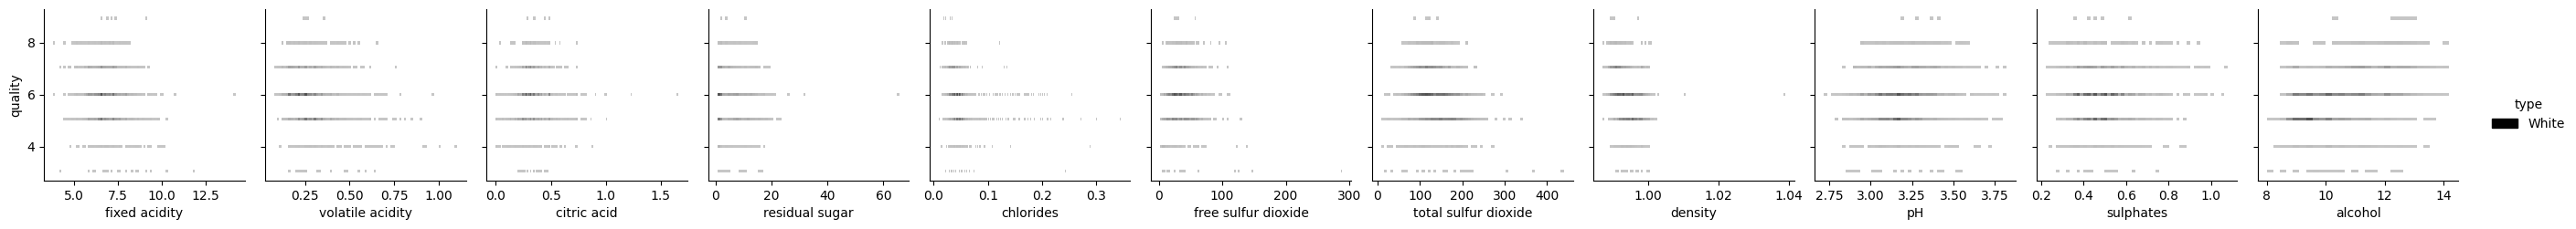

In [ ]:
#Simple vis - White wine
### What does assignment want? to plot each variable amongst each other (i.e., 11^2 = 121 graphs ?, or just effects of each on quality = 11 graphs)
sns.pairplot(data=df_main_white, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], y_vars=['quality'], hue='type', palette=['k'], kind='hist')

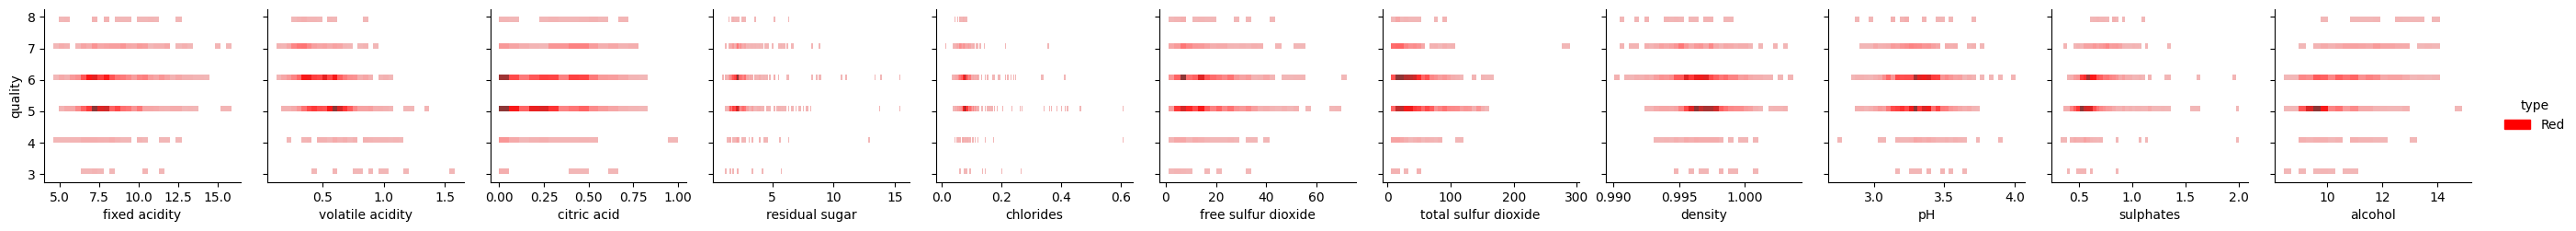

In [ ]:
#Simple vis - Red wine
sns.pairplot(data=df_main_red, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], y_vars=['quality'], hue='type', palette=['r'], kind='hist')

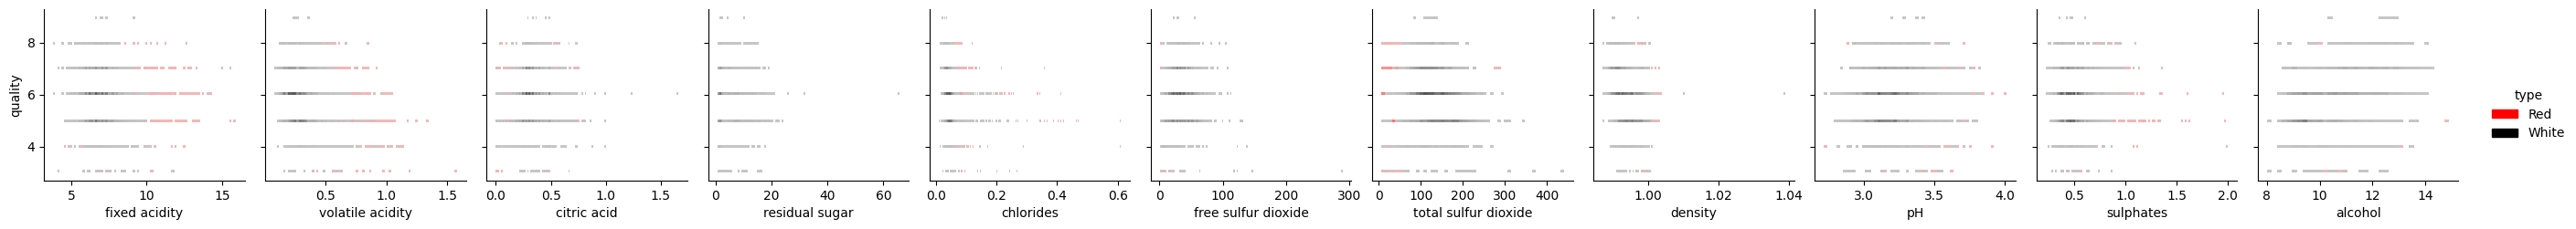

In [ ]:
#Simple vis - red and white wine
sns.pairplot(data=df_main, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], y_vars=['quality'], hue='type', palette=['r','k'], kind='hist')

In [ ]:
#Initialise dataframe, normalise values
#Normalisation of x by x-min(x) / (max(x)-min(x))
data=data1
df_norm = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

### SENSITIVITY: amount of physicochemical parameters used for modelling, need to cull certain columns.
# USE BELOW CODE, REPLACE COLUMNS WITH PARAMETERS TO BE REMOVED
# df_norm = df_norm.drop(['COLUMN', 'COLUMN2', 'ETC'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
846,0.214876,0.373333,0.126506,0.018405,0.119601,0.045139,0.057604,0.188548,0.674419,0.247191,0.260870
741,0.446281,0.300000,0.144578,0.030675,0.114618,0.093750,0.306452,0.207634,0.379845,0.196629,0.217391
1777,0.181818,0.393333,0.042169,0.009202,0.084718,0.027778,0.235023,0.115481,0.302326,0.073034,0.101449
129,0.190083,0.200000,0.090361,0.018405,0.104651,0.017361,0.029954,0.161751,0.542636,0.196629,0.202899
6199,0.371901,0.093333,0.204819,0.007669,0.056478,0.065972,0.253456,0.107769,0.217054,0.140449,0.318841


In [ ]:
#Convert type labels to indices for use in NN
target = data[['type']].replace(['Red', 'White'],[0,1])
target2 = data[['quality']]
#Red = 0, white = 1

# Quality indices
target2.sample(n=5)

,quality
1856,7
3362,6
6325,6
3661,5
4687,6


In [ ]:
#concatenate 'type' column with normalised dataframe df_norm
df = pd.concat([df_norm,target2, target], axis=1)
df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4496,0.239669,0.226667,0.277108,0.139571,0.074751,0.229167,0.525346,0.219202,0.395349,0.157303,0.144928,5,1
5973,0.214876,0.180000,0.126506,0.023006,0.069767,0.156250,0.380184,0.117409,0.341085,0.157303,0.217391,5,1
1671,0.181818,0.126667,0.168675,0.064417,0.089701,0.104167,0.449309,0.179102,0.751938,0.275281,0.289855,5,1
4816,0.165289,0.166667,0.138554,0.067485,0.073090,0.097222,0.230415,0.144014,0.317829,0.168539,0.144928,5,1
5089,0.314050,0.153333,0.144578,0.018405,0.046512,0.131944,0.331797,0.080779,0.255814,0.123596,0.550725,7,1


In [ ]:
#Split data by training group and testing group
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per #select randomly
#add 'train' column with shape = len(df), condition that randomly generated numbers [0,1) < train_test_per
#Results in column of var type = boolean

#NOTE: the way this line of code works is that it creates a new column in the dataframe 'df'
# with randomly generated floats in [0, 1) via np.random.rand(), however '<' condition based on training split (for ex. 90/100 or 0.9)
# will convert each row in column 'train' to a Boolean value on whether the randomly generated value in [0, 1)
# satisfies < 0.9 condition.

# why is this important and why am I writing such a huge comment about it?
# this means that for a specified training split condition (like 0.9 or 90%),
# it is contingent on the randomiser to provide values where 90% of the randomly generated numbers are actually < 0.9
# while the number distribution follows this generally, it will never realistically provide a
# a 'perfect' distribution between [0,1) that alligns exactly with the train/test split.
# This is very easily verifiable; run the code block and observe sizes of df_test, df_train.
# they will vary, albeit slightly. Nevertheless, this is an important distinction especially since one of the studies
# is on the effects of varying splitting ratio -- if we don't even know exact the splitting ratio, how do we quantify it?
# Intuitively, the way it is coded above makes the most sense because not all data can be exactly split into 90-10 groups
# for example, if a dataset contains 101 rows, 90% would be 90.9 rows -- what does 0.9 rows of data even mean?
# TLDR: basically, setting a train_test_per = 0.9 DOES NOT guarantee a 90-10 training-testing split, as much as the var name would suggest

df.sample(n=5)
df_train = df[df.train == True]
df_test = df[df.train == False]
actual_split = len(df_train)/len(df)
print(actual_split)

###SENSITIVITY
# CHANGE train_test_per to whatever value, note the actual split (actual_split var)

0.8979529013390796


In [ ]:
#Training data
# resT = 0
# resF = 0
# for x in range(len(df.train)):
#   if df.train[x] == 1:
#     resT += 1
#   elif df.train[x] == 0:
#     resF += 1

train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5269,0.198347,0.086667,0.108434,0.168712,0.058140,0.208333,0.343318,0.181993,0.325581,0.168539,0.202899,6,1
413,0.504132,0.213333,0.319277,0.093558,0.146179,0.017361,0.029954,0.221515,0.426357,0.337079,0.536232,7,0
3243,0.289256,0.073333,0.295181,0.229294,0.081395,0.170139,0.294931,0.244650,0.542636,0.078652,0.159420,7,1
72,0.322314,0.406667,0.132530,0.019939,0.124585,0.059028,0.202765,0.173318,0.457364,0.146067,0.217391,5,0
5514,0.074380,0.250000,0.108434,0.019939,0.044850,0.111111,0.230415,0.006748,0.379845,0.342697,0.869565,7,1


In [ ]:
#Testing data
test = df[df.train == 0]
test = test.drop('train', axis=1) #remove boolean train column
test.sample(n=5)

#Note that test and train dataframes are equivalent to df_train and df_test (before removal of train column)
#The existing dataframes are not called because they are used in calcs for actual_split

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3374,0.322314,0.273333,0.602410,0.291411,0.034884,0.093750,0.297235,0.196453,0.403101,0.101124,0.579710,6,1
1035,0.520661,0.193333,0.204819,0.027607,0.126246,0.013889,0.025346,0.187392,0.348837,0.241573,0.376812,7,0
2433,0.289256,0.083333,0.186747,0.016871,0.084718,0.114583,0.239631,0.177174,0.775194,0.264045,0.362319,6,1
4575,0.247934,0.160000,0.234940,0.138037,0.028239,0.114583,0.271889,0.110854,0.356589,0.073034,0.594203,6,1
183,0.247934,0.353333,0.120482,0.018405,0.112957,0.034722,0.135945,0.192597,0.635659,0.202247,0.188406,5,0


In [ ]:
X = train.values[:,:(len(train.columns)-2)] #Training data without 'quality' and 'type' column
X[:5] #see first 5 rows of training data
#train.values[:,11]
#len(train.columns)

array([[0.39669421, 0.48      , 0.06626506, 0.02607362, 0.12458472,
        0.03819444, 0.05760369, 0.20802005, 0.52713178, 0.14606742,
        0.27536232],
       [0.14876033, 0.12      , 0.30120482, 0.16564417, 0.03322259,
        0.08333333, 0.20046083, 0.13823019, 0.39534884, 0.15168539,
        0.36231884],
       [0.29752066, 0.05333333, 0.1626506 , 0.22852761, 0.06810631,
        0.08333333, 0.29723502, 0.21765953, 0.13953488, 0.11797753,
        0.10144928],
       [0.24793388, 0.36666667, 0.04216867, 0.02300613, 0.13289037,
        0.03472222, 0.0875576 , 0.15789474, 0.58139535, 0.18539326,
        0.34782609],
       [0.51239669, 0.40666667, 0.06626506, 0.01226994, 0.12458472,
        0.02430556, 0.04147465, 0.16714864, 0.12403101, 0.14044944,
        0.24637681]])

In [ ]:
#Number of different 'quality' values
quality_min = min(df.quality)
quality_max = max(df.quality)
quality_range = quality_max - quality_min + 1
quality_range

#Initialise targets matrix for quality
targets2_var = np.identity(quality_range, dtype='int')
targets2_var
targets2 = []
for x in range(len(targets2_var)):
  targets2.append(targets2_var[x,:])
targets2
#Each row corresponds to a quality i.e., [1,0,0,0,0,0,0] = lowest quality, etc.
#This is dependent on the batch (for ex, the lowest quality is 3 and highest 9, but this may not be the full scale of quality measurement
#Initialising dynamic matrix makes code usable in case future data is added with quality OUTSIDE of 3-9
#Q: does a minimum (3) and maximum (9) mean that it should be impossible for the ANN to predict qualties outside this range? need to ask

[array([1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 1])]

In [ ]:
targets = [[1,0],[0,1]]
#create y array based on values of rightmost column (type)
y1 = np.array([targets[int(x)] for x in train.values[:,(len(train.columns)-1)]])
y2 = np.array([targets2[int(x) - int(min(df.quality))] for x in train.values[:,(len(train.columns)-2)]])
y = np.concatenate((y2,y1), axis=1)
y
#array with quality range + 2 columns; last two columns determine if wine is red/white, first column(s) determine quality

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
#Length test for output
out_shape = np.shape(y)[1]

In [ ]:
#Draw neural network
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
  #Draw NN usign matplotlib
  #usage:
  #fig = plt.figure(figsize=(12, 12))
  #draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

  n_layers = len(layer_sizes)
  v_spacing = (top - bottom)/float(max(layer_sizes))
  h_spacing = (right - left)/float(len(layer_sizes) - 1)
  #nodes
  for n, layer_size in enumerate(layer_sizes):
    layer_top = v_spacing * (layer_size - 1)/2. + (top + bottom)/2.
    for m in range(layer_size):
        circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4., color = 'w', ec='k', zorder=4)
        ax.add_artist(circle)
  #edges
  for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
    layer_top_a = v_spacing * (layer_size_a - 1)/2. + (top + bottom)/2.
    layer_top_b = v_spacing * (layer_size_b - 1)/2. + (top + bottom)/2.
    for m in range(layer_size_a):
      for o in range(layer_size_b):
        line = plt.Line2D([n*h_spacing + left, (n+1)*h_spacing + left], [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
        ax.add_artist(line)


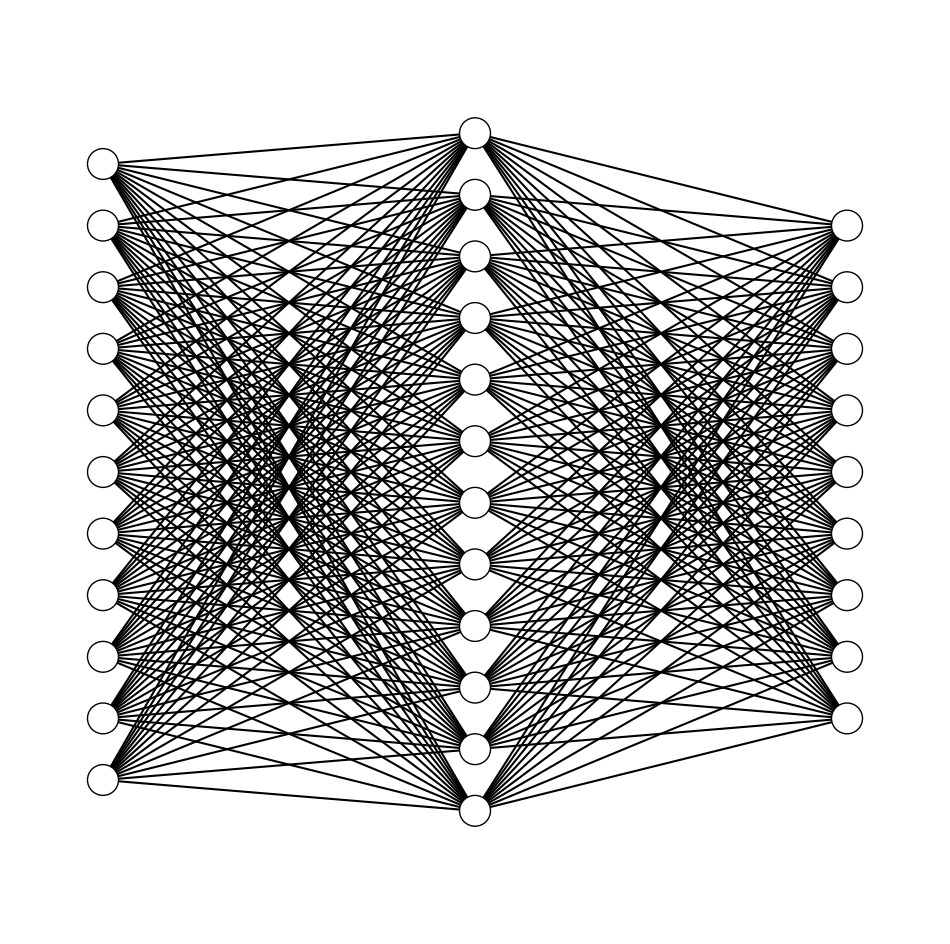

In [ ]:
#Graphical rep. of ANN
#first set of 4 nodes = input
#second set of 5 nodes is the hidden layer
#last set of 3 nodes is the output layer
#all nodes of a layer are fully connected to all nodes of the next layer
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax.axis('off')
hidden_layer_neurons = len(train.columns)-1 #always +1 of input physicochemical params
draw_neural_net(ax, .1, .9, .1, .9, [(len(train.columns)-2), hidden_layer_neurons, out_shape])

###SENSITIVITY: Neural network architecture
# Is this referring to amount of hidden layer nodes? Not sure, need to check
# If so, change 'hidden_layer_neurons'

In [ ]:
#w1: weights of connections between first layer and hidden layer (5 connections for each node)
num_inputs = len(X[0]) #columns
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1 #array shape columns x hidden_layer_neurons, each row is the weights of each hidden layer neuron, randomised

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765,
        -0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694,
         0.55876584, -0.60462985],
       [ 0.72598647,  0.96680135, -0.67231552,  0.19466789, -0.9820278 ,
        -0.22685743, -0.91167988,  0.91330594, -0.12770671,  0.89795461,
         0.57261197,  0.7325786 ],
       [-0.65366916, -0.85010283,  0.20148544, -0.66405563,  0.46676034,
        -0.18311228,  0.05581765,  0.87514317,  0.04339224, -0.78361323,
        -0.68355319,  0.0904053 ],
       [ 0.04880816,  0.27522049, -0.19700911,  0.29961022, -0.20619999,
         0.24783223,  0.53480993, -0.64205218, -0.24884846,  0.00506612,
         0.37333416, -0.4926407 ],
       [ 0.10948173,  0.24986169,  0.79100233, -0.27429282,  0.27511415,
        -0.6171072 , -0.00441177, -0.63510919,  0.83676608, -0.13635586,
         0.6603762 , -0.16644739],
       [ 0.80933518, -0.19034957, -0.33765099,  0.14427754,  0.6908873 ,
         0.72202862,  

In [ ]:
#w2 weights of connections between hidden layer and output layer (shape: 5x3)
num_outputs = len(y[0])
np.random.seed(4)
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765,
        -0.56782101,  0.95254891, -0.98753949, -0.49403528],
       [-0.13041694,  0.55876584, -0.60462985,  0.72598647,  0.96680135,
        -0.67231552,  0.19466789, -0.9820278 , -0.22685743],
       [-0.91167988,  0.91330594, -0.12770671,  0.89795461,  0.57261197,
         0.7325786 , -0.65366916, -0.85010283,  0.20148544],
       [-0.66405563,  0.46676034, -0.18311228,  0.05581765,  0.87514317,
         0.04339224, -0.78361323, -0.68355319,  0.0904053 ],
       [ 0.04880816,  0.27522049, -0.19700911,  0.29961022, -0.20619999,
         0.24783223,  0.53480993, -0.64205218, -0.24884846],
       [ 0.00506612,  0.37333416, -0.4926407 ,  0.10948173,  0.24986169,
         0.79100233, -0.27429282,  0.27511415, -0.6171072 ],
       [-0.00441177, -0.63510919,  0.83676608, -0.13635586,  0.6603762 ,
        -0.16644739,  0.80933518, -0.19034957, -0.33765099],
       [ 0.14427754,  0.6908873 ,  0.72202862,  0.19137623, -0

Text(0, 0.5, 'f(x)')

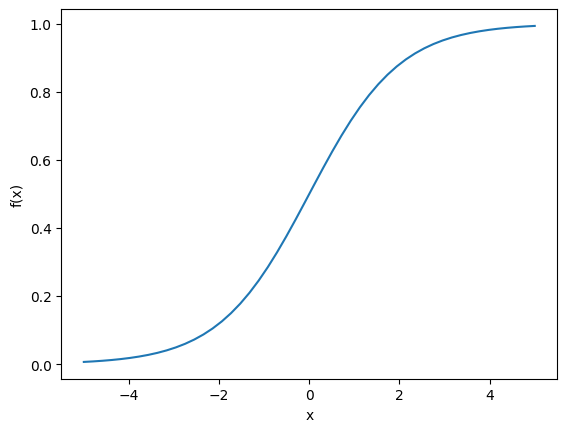

In [ ]:
#feedforward (use current weights to calc. output)
#node activation  = output from prev. layer * weights
#node output = sigmoid activation function f = 1 / (1 + exp( nod act. ) )

#backpropagation ( update network weights ):
#error calc ( how far off from expected values):
#derivative = output * (1 - output) (for sigmoidal act. f)
#error (for last layer) = (expected - output) * derivative
#error (for other layers) = ( error calculated previously * that layer's weight ) * derivative
#update weight based on error calculated:
#Weight = weight + (output * error * learning rate)

#Activation function
# sigmoid
_x = np.linspace( -5, 5, 50)
_y = 1 / (1 + np.exp( -_x ) )
plt.plot( _x, _y )
plt.xlabel('x')
plt.ylabel('f(x)')

In [ ]:
#training and backpropagation
##training
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
  #activate the first layer using input
  # matrix multiplication between input and the layer 1 weights
  # result is fed into a sigmoid function
  l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
  #activate second layer using first layer as input
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
  # find avg error of batch
  er = (abs(y - l2)).mean()
  error.append(er)

  #backprop
  # find contribution of error on each weight on the second layer
  l2_delta = (y - l2)*(l2 * (1-l2))
  # update each weight in second layer slowly
  w2 += l1.T.dot(l2_delta) * learning_rate

  # find contribution of error on each weight on the second layer w.r.t the first layer
  l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
  # update weights in the first layer
  w1 += X.T.dot(l1_delta) * learning_rate

print('Error:', er)


<ipython-input-38-61978ec39e32>:11: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
<ipython-input-38-61978ec39e32>:11: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
<ipython-input-38-61978ec39e32>:11: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
<ipython-input-38-61978ec39e32>:11: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
<ipython-input-38-61978ec39e32>:11: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))


Error: 0.2222222222222222


Text(0, 0.5, 'Error')

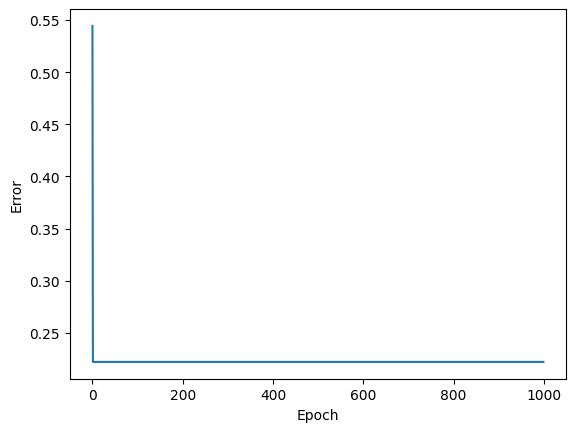

In [ ]:
#plotting error
plt.plot(error)
plt.xlabel('Epoch')
plt.ylabel('Error')

In [ ]:
test.values[:,:(len(test.columns)-2)]

array([[0.33057851, 0.45333333, 0.02409639, ..., 0.41860465, 0.24157303,
        0.26086957],
       [0.30578512, 0.28      , 0.21686747, ..., 0.48837209, 0.3258427 ,
        0.36231884],
       [0.29752066, 0.34      , 0.04819277, ..., 0.51162791, 0.15730337,
        0.14492754],
       ...,
       [0.19008264, 0.17333333, 0.1746988 , ..., 0.26356589, 0.12359551,
        0.55072464],
       [0.2231405 , 0.1       , 0.22891566, ..., 0.44186047, 0.17977528,
        0.24637681],
       [0.23140496, 0.16      , 0.21686747, ..., 0.33333333, 0.13483146,
        0.23188406]])

In [ ]:
#TEST ANN
# run network with updated weights from training
X = test.values[:,:(len(test.columns) - 2)]
#y = np.array([targets2[int(x) - quality_min ] for x in test.values[:,(test.columns - 2)]])
y1 = np.array([targets[int(x)] for x in test.values[:,(len(test.columns)-1)]])
y2 = np.array([targets2[int(x) - int(min(df.quality))] for x in test.values[:,(len(train.columns)-2)]])
y = np.concatenate((y2,y1), axis=1)
l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
np.round(l2,3)


<ipython-input-57-432c11a2709c>:9: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))


array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [ ]:
#from generated matrix, take max value per row whcih forms predictions
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)
testres = test[['Component']].replace([0,1,2], ['A', 'B', 'C'])
testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['A','B','C'])

print(testres)
print('Correct:', sum(res), '/', len(res), ':', (correct*100), '%')

    Component Prediction
6           A          A
59          B          B
78          B          B
88          B          B
101         C          C
110         C          C
121         C          C
123         C          C
Correct: 8 / 8 : 100.0 %
